# Investigation of the polynomial fitting method for density-to-enthalpy conversion

This notebook investigates the creation of a polynomial for the density-to-enthalpy conversion. 

This method consists in the creation of a polynomial built from a dataset, using the NumPy functions `polyfit` and `polyval`. 
`polyval` is chosen because it is considered to be sufficiently efficient due to its use of the Horner scheme.

The time effort and accuracy of the method are usually impacted by dataset size and polynomial degree. For this reason, this evaluation considers datasets of different sizes and polynomial degrees. The analysis is performed for all coolant materials: _lead_, _LBE_, _bismuth_, _sodium_, and _NaK_.

The procedure is identical for all materials and follows these steps:

- **Database generation:** A database of densities and corresponding enthalpies is generated using coolant-specific correlations. Both properties are computed over the same temperature range, which corresponds to the smallest common range among the density and enthalpy correlations. The database is sized to provide approximately a 0.1 K interval between successive temperature points.

- **Reference database:** A reference database is required to assess the accuracy of the method. It consists of 1,000 data points and covers a narrower temperature range than the database used for polynomial fitting.

- **Polynomial degree and accuracy evaluation:** The accuracy of the fitting is evaluated against the reference dataset for progressively increasing polynomial degrees.

In [1]:
import importlib
import auxiliary
importlib.reload(auxiliary)

import numpy as np
import os
from auxiliary import generate_database, eval_poly, plot_polynomial_results
from _commons import ENTHALPY_RANGE, PATH_TO_DATA, DATA_EXTENSION, \
    REFERENCE_SUFFIX




## Database generation
Databases are generated by the function _generate_database_, imported from the _auxiliary_ module, and stored in the _data_ folder. First the datasets for polynomial fitting are generated, then the reference ones. 

In [2]:
for material in ENTHALPY_RANGE:
    generate_database(material)
    generate_database(material, reference=True)

## Polynomial degree and accuracy evaluation

----------------------------------------

Fitting and evaluating polynomials for lead...
Evaluating polynomium degree 1...
Evaluating polynomium degree 2...
Evaluating polynomium degree 3...
Evaluating polynomium degree 4...
Evaluating polynomium degree 5...
Evaluating polynomium degree 6...
Evaluating polynomium degree 7...
Polynomial degree 7 issues a NumPy RankWarning. Stopping here.
----------------------------------------

Fitting and evaluating polynomials for LBE...
Evaluating polynomium degree 1...
Evaluating polynomium degree 2...
Evaluating polynomium degree 3...
Evaluating polynomium degree 4...
Evaluating polynomium degree 5...
Evaluating polynomium degree 6...
Evaluating polynomium degree 7...
Evaluating polynomium degree 8...
Polynomial degree 8 issues a NumPy RankWarning. Stopping here.
----------------------------------------

Fitting and evaluating polynomials for bismuth...
Evaluating polynomium degree 1...
Evaluating polynomium degree 2...
Evaluating polynomium degre

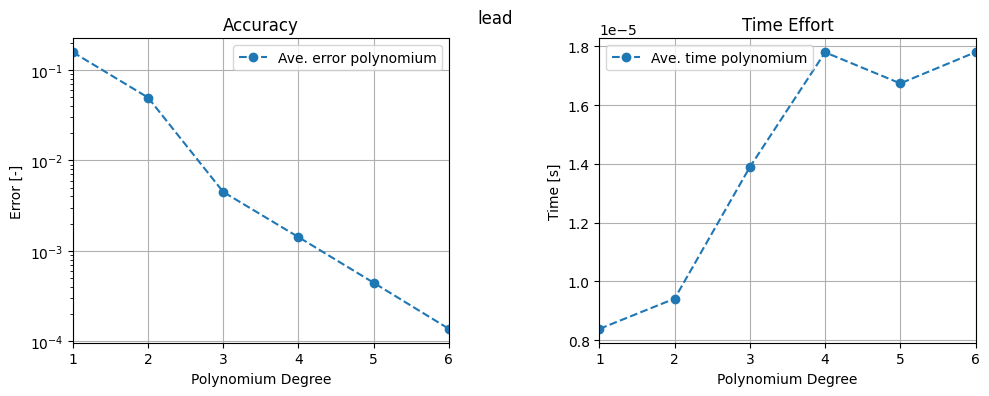

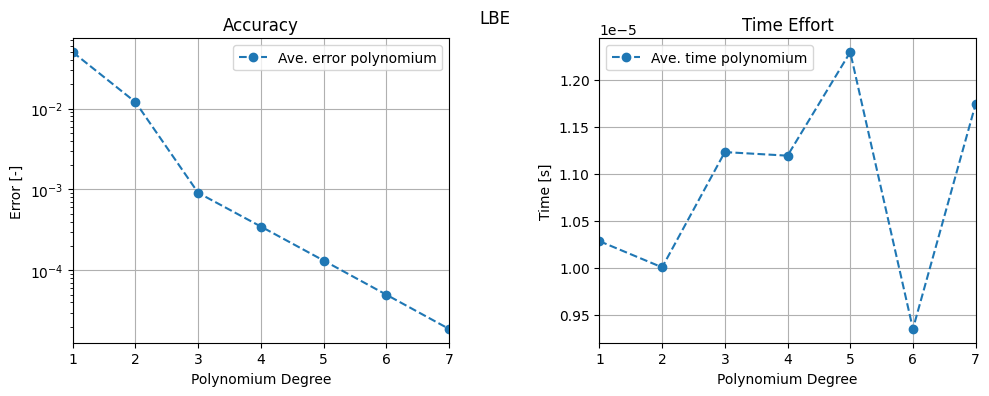

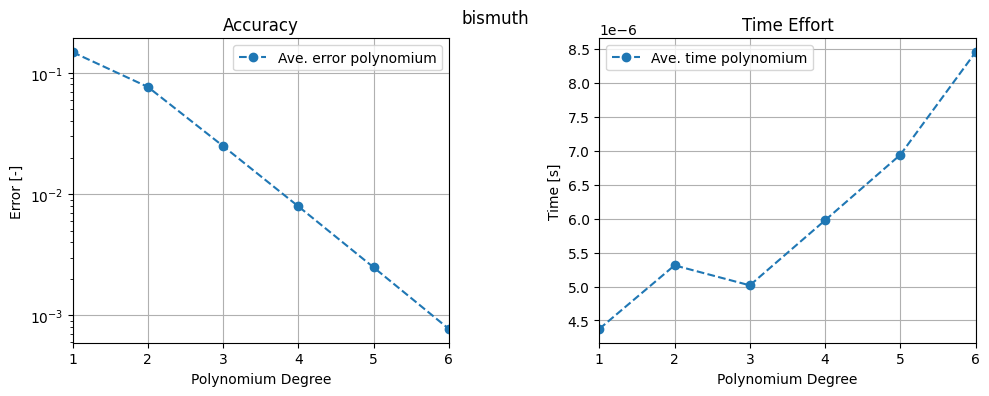

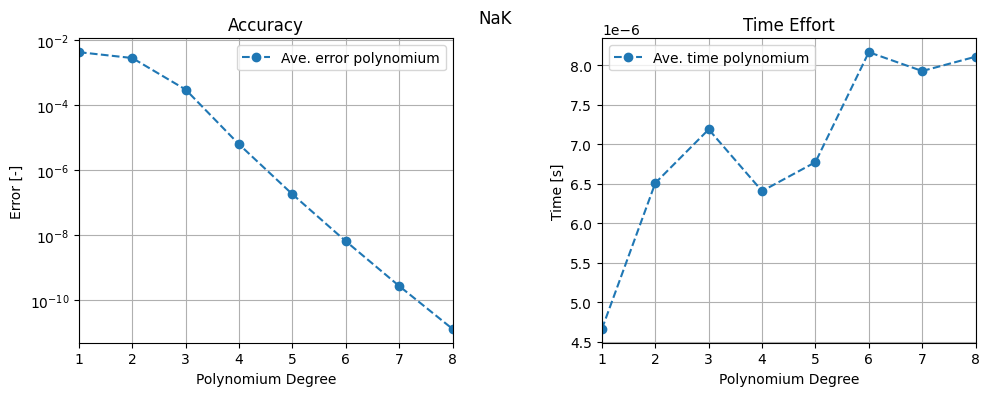

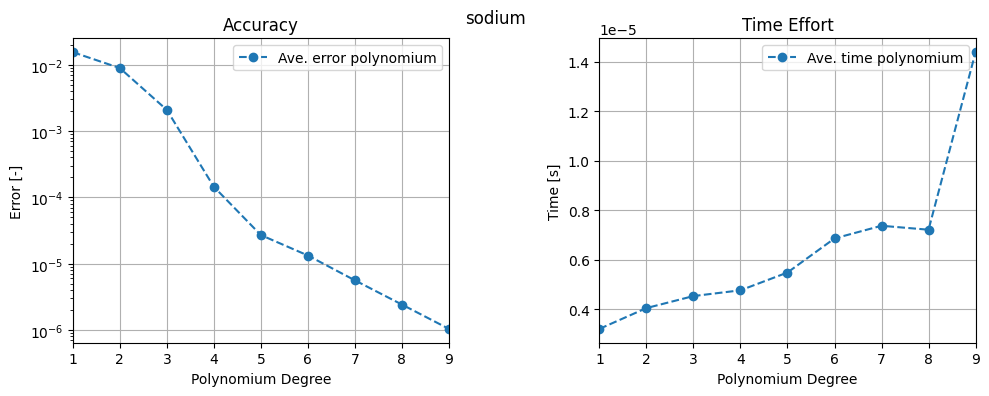

In [3]:
for material in ENTHALPY_RANGE:
    print('----------------------------------------')
    print(f'\nFitting and evaluating polynomials for {material}...')
    reference_data = np.genfromtxt(os.path.join(PATH_TO_DATA, material + 
                                          REFERENCE_SUFFIX + DATA_EXTENSION), 
                                   delimiter=',')
    data4fit = np.genfromtxt(os.path.join(PATH_TO_DATA, material + 
                                          DATA_EXTENSION), delimiter=',')
    
    poly_res, max_deg = eval_poly(reference_data, data4fit)
    plot_polynomial_results(poly_res, material, max_deg)